# MORTGAGE BACKED SECURITIES PREPAYMENT MACHINE LEARNING MODEL

# Data Preprocessing and EDA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('LoanExport.csv')
pd.set_option('display.max_columns', None)
data.head(7)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,207000,89,7.125,T,N,FRM,CO,SF,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,111000,90,6.875,T,N,FRM,WI,SF,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44


In [3]:
# shape of dataset
print('The shape of dataset is: ', data.shape)

The shape of dataset is:  (291451, 28)


In [4]:
# information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [5]:
# statistical measurement of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,291451.0,708.936991,68.408791,0.0,675.00,717.000,753.000,849.00
FirstPaymentDate,291451.0,199904.760553,13.821228,199901.0,199903.00,199904.000,199905.000,201303.00
MaturityDate,291451.0,202902.367043,16.090508,202402.0,202902.00,202903.000,202904.000,204302.00
MIP,291451.0,9.216685,12.648273,0.0,0.00,0.000,25.000,55.00
Units,291451.0,1.026022,0.202986,0.0,1.00,1.000,1.000,4.00
OCLTV,291451.0,76.960529,15.236154,0.0,70.00,80.000,90.000,110.00
DTI,291451.0,30.033453,13.203974,0.0,22.00,31.000,39.000,65.00
OrigUPB,291451.0,124940.387921,53657.440624,8000.0,83000.00,117000.000,160000.000,497000.00
LTV,291451.0,76.937986,15.225298,0.0,70.00,80.000,90.000,103.00
OrigInterestRate,291451.0,6.926547,0.343541,4.0,6.75,6.875,7.125,12.35


In [6]:
# checking null values
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [7]:
dup=data.drop_duplicates(inplace=True)

In [8]:
# after removing null value column.
data.isna().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [9]:
# unique values in data
data.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [10]:
# columns of dataset
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [11]:
# Convert first payment date and maturity date column into datetime format
data['FirstPaymentDate']=pd.to_datetime(data['FirstPaymentDate'],format="%Y%m")

In [12]:
data['MaturityDate']=pd.to_datetime(data['MaturityDate'],format="%Y%m")

In [13]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [14]:
#  here in credit score 0 is actually 850 so we are going to convert 0 into that specific num 850

In [15]:
data['CreditScore'] = np.where(data['CreditScore'] == 0, 850,data['CreditScore'])

In [16]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,850,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,850,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,850,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,850,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,850,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [17]:
#make a specific range of credit score column and naming these ranges as poor fair good excellent.
# Ranges distribution:
# (0-650) ----> Poor
# (650-700) ----> Fair
# (700-750) ----> Good
# (750-900) ----> Excellent
labal=["Poor","Fair","Good","Excellent"]
bin_range=[0,650,700,750,900]
data['CreditScore'] = pd.cut(data['CreditScore'],bins=bin_range,precision=4,labels=labal,ordered=True)

In [18]:
data['CreditScore'].value_counts()

Good         99172
Excellent    78508
Fair         74559
Poor         39212
Name: CreditScore, dtype: int64

In [19]:
data['FirstTimeHomebuyer'].value_counts()

N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [20]:
# In first time home buyer x is actually null values so we will remove all these rows which contain X values
data = data[data['FirstTimeHomebuyer'] !='X']

In [21]:
data['FirstTimeHomebuyer'].value_counts()

N    184154
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [22]:
# set binnig for ltv
label=['Low','Medium','High']
binn=[-1,25,50,1000]
data['LTV'] = pd.cut(data['LTV'],bins=binn,precision=3,labels=label,ordered=True)

In [23]:
data['LTV'].value_counts()

High      198869
Medium     13203
Low         1364
Name: LTV, dtype: int64

In [24]:
# set binning for months repayment col:
bin=[0,48,96,144,192,240]
label=['0-4yrs','4-8yrs','8-12yrs', '12-16yrs', '16-20yrs']
data['MonthsInRepayment'] = pd.cut(data['MonthsInRepayment'],bins=bin,precision=5,labels=label,ordered=True)

In [25]:
data['MonthsInRepayment'].value_counts()

0-4yrs      108942
4-8yrs       73649
8-12yrs      13911
12-16yrs      8755
16-20yrs      8179
Name: MonthsInRepayment, dtype: int64

In [26]:
# set binning for months repayment col:
bin=[-1,25,50,10000]
label=['Low','Medium','High']
data['OCLTV'] = pd.cut(data['OCLTV'],bins=bin,precision=5,labels=label,ordered=True)

In [27]:
data['OCLTV'].value_counts()

High      198877
Medium     13196
Low         1363
Name: OCLTV, dtype: int64

In [28]:
# set bin fosr original loan term col:
bin=[280,324,360]
label=['Below-27','Above-27']
data['OrigLoanTerm'] = pd.cut(data['OrigLoanTerm'],bins=bin,precision=2,labels=label,ordered=True)

In [29]:
data['OrigLoanTerm'].value_counts()

Above-27    213113
Below-27       322
Name: OrigLoanTerm, dtype: int64

In [30]:
# set bin for DTI col:
bin=[-1,36,43,75]
label=['Low','Medium','High']
data['DTI'] = pd.cut(data['DTI'],bins=bin,precision=3,labels=label,ordered=True)

In [31]:
data['DTI'].value_counts()

Low       142379
Medium     41240
High       29817
Name: DTI, dtype: int64

In [32]:
# set bin fosr monthsdeliquent col:
bin=[-1,50,100,250]
label=['Below-50','Below-100','Above-100']
data['MonthsDelinquent'] = pd.cut(data['MonthsDelinquent'],bins=bin,precision=3,labels=label,ordered=True)

In [33]:
data['MonthsDelinquent'].value_counts()

Below-50     211810
Below-100      1245
Above-100       381
Name: MonthsDelinquent, dtype: int64

# Visualization of Data

In [34]:
numerical=data.select_dtypes(exclude='object').columns.tolist()

In [35]:
# sns.boxplot(numerical)

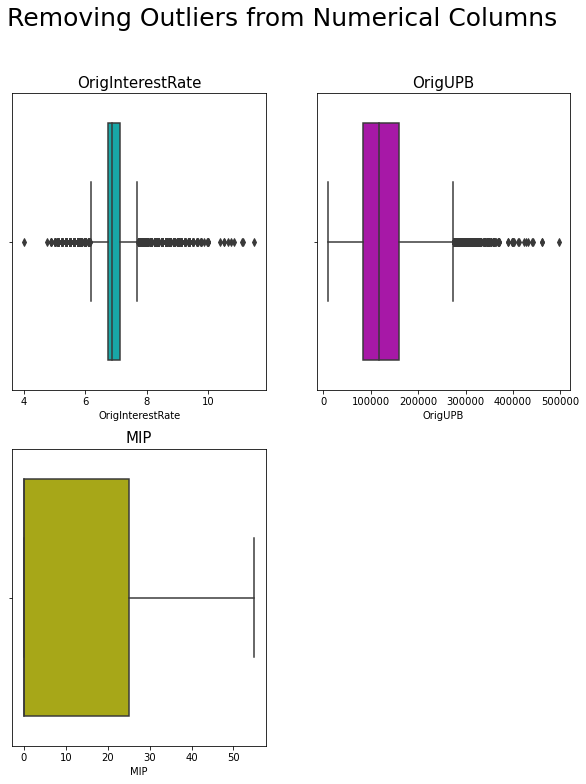

In [36]:
# boxplots after removal of outliers
plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.title('OrigInterestRate',fontsize=15)
sns.boxplot(data['OrigInterestRate'],color='c')


plt.subplot(2,2,2)
plt.title('OrigUPB',fontsize=15)
sns.boxplot(data['OrigUPB'],color='m')

plt.subplot(2,2,3)
plt.title('MIP',fontsize=15)
sns.boxplot(data['MIP'],color='y')

plt.suptitle('Removing Outliers from Numerical Columns',fontsize=25)
plt.show()

In [37]:
# removing outlier from founded col:
def remove_outlier(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    #Interquartile range
    IQR = q3-q1
    lower_bound  = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    filter_outlier= data.loc[(data[col_name] > lower_bound) & (data[col_name] < upper_bound)]
    return filter_outlier

In [38]:
oir_outlier=remove_outlier(data,'OrigInterestRate')
orinbp_outlier=remove_outlier(data,'OrigUPB')
mip_outlier=remove_outlier(data,'MIP')

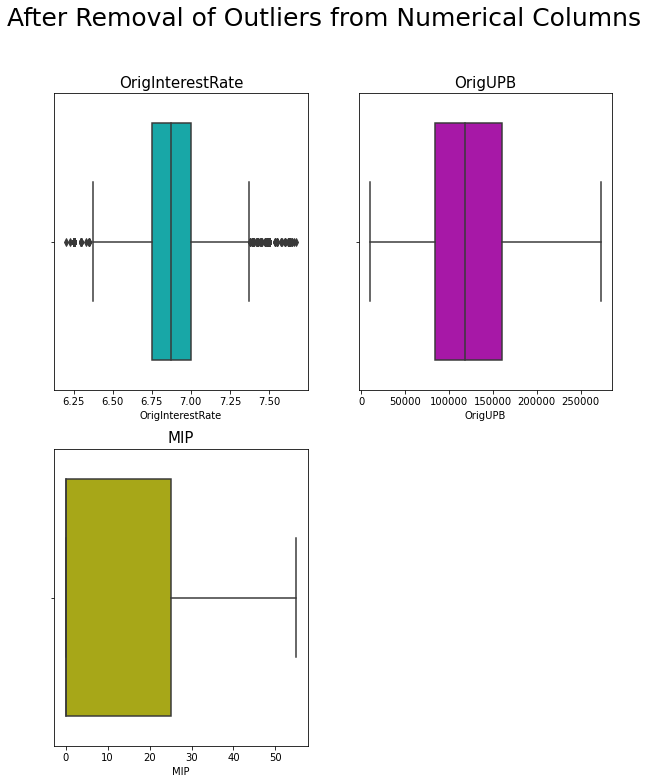

In [39]:
# boxplots after removal of outliers
plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.title('OrigInterestRate',fontsize=15)
sns.boxplot(oir_outlier['OrigInterestRate'],color='c')


plt.subplot(2,2,2)
plt.title('OrigUPB',fontsize=15)
sns.boxplot(orinbp_outlier['OrigUPB'],color='m')

plt.subplot(2,2,3)
plt.title('MIP',fontsize=15)
sns.boxplot(mip_outlier['MIP'],color='y')

plt.suptitle('After Removal of Outliers from Numerical Columns',fontsize=25)
plt.show()

# ploting of some features wrt to target column:

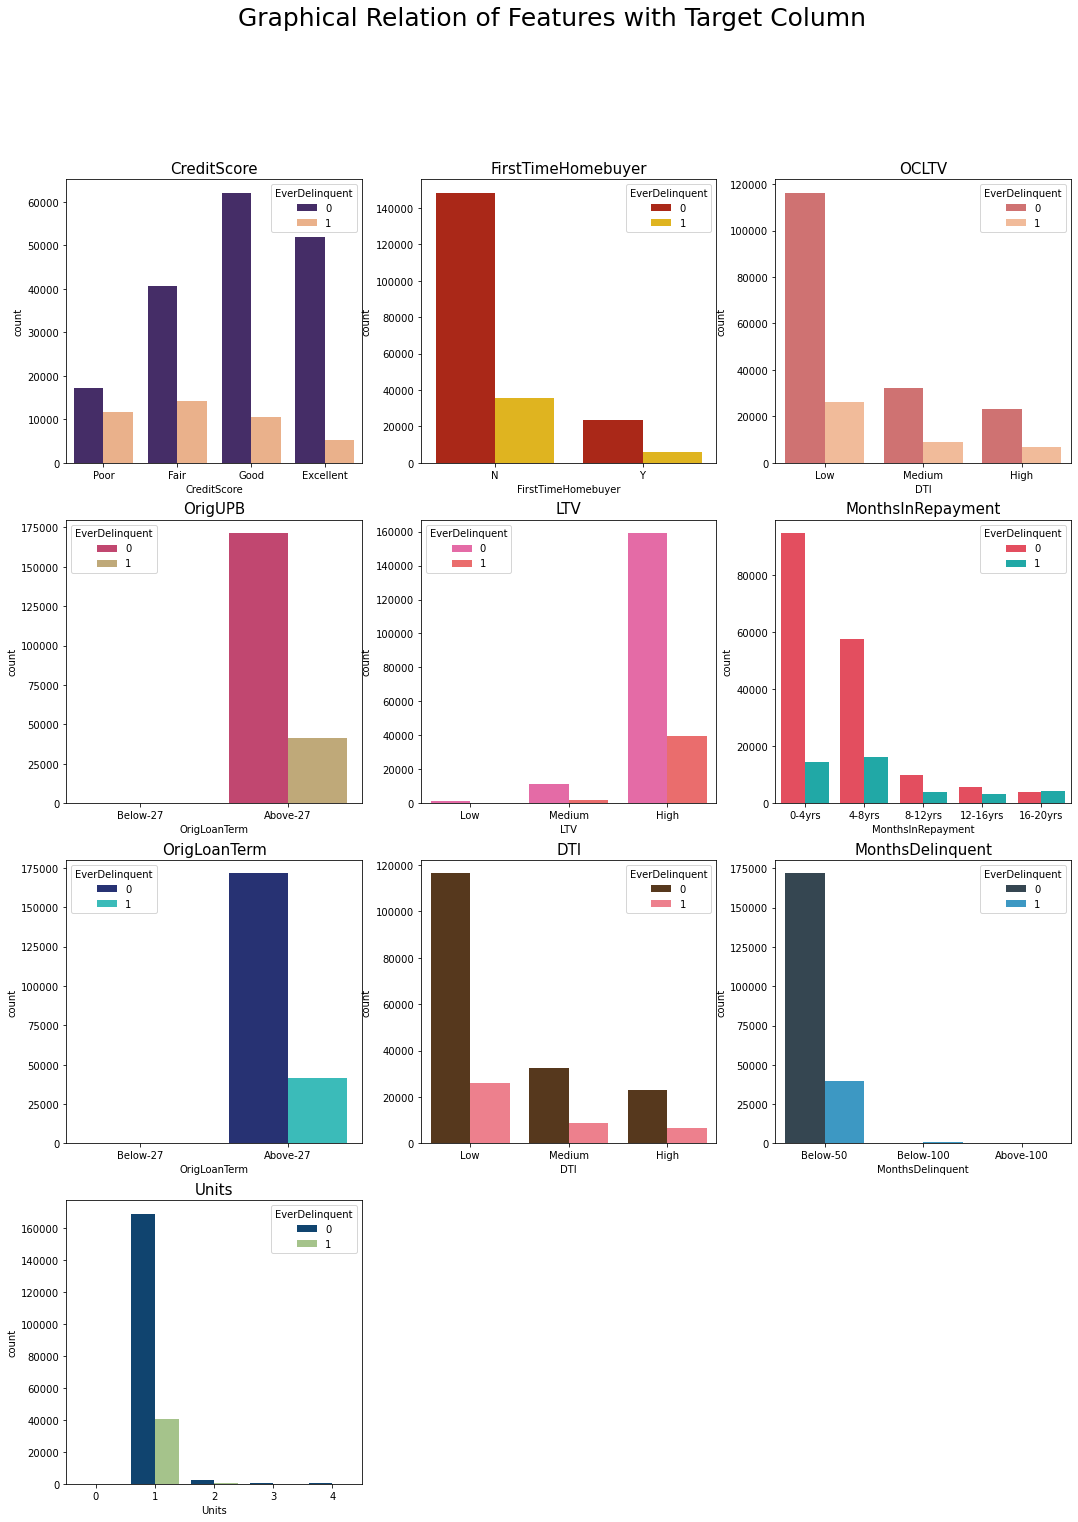

In [40]:
# comparing graphs of some features with target column
plt.figure(figsize=(18,24))
plt.subplot(4,3,1)
plt.title('CreditScore',fontsize=15)
sns.countplot(x='CreditScore', hue='EverDelinquent', data=data,palette=['#432371',"#FAAE7B"])

plt.subplot(4,3,2)
plt.title('FirstTimeHomebuyer',fontsize=15)
sns.countplot(x='FirstTimeHomebuyer', hue='EverDelinquent', data=data,palette=['#c21500','#ffc500'])

plt.subplot(4,3,3)
plt.title('OCLTV',fontsize=15)
sns.countplot(x='DTI', hue='EverDelinquent', data=data,palette=['#DE6262','#FFB88C'])

plt.subplot(4,3,4)
plt.title('OrigUPB',fontsize=15)
sns.countplot(x='OrigLoanTerm', hue='EverDelinquent', data=data,palette=['#d53369','#cbad6d'])

plt.subplot(4,3,5)
plt.title('LTV',fontsize=15)
sns.countplot(x='LTV', hue='EverDelinquent', data=data,palette=['#f857a6','#ff5858'])

plt.subplot(4,3,6)
plt.title('MonthsInRepayment',fontsize=15)
sns.countplot(x='MonthsInRepayment', hue='EverDelinquent', data=data,palette=['#FC354C','#0ABFBC'])

plt.subplot(4,3,7)
plt.title('OrigLoanTerm',fontsize=15)
sns.countplot(x='OrigLoanTerm', hue='EverDelinquent', data=data,palette=['#1A2980','#26D0CE'])

plt.subplot(4,3,8)
plt.title('DTI',fontsize=15)
sns.countplot(x='DTI', hue='EverDelinquent', data=data,palette=['#603813','#ff6e7f'])

plt.subplot(4,3,9)
plt.title('MonthsDelinquent',fontsize=15)
sns.countplot(x='MonthsDelinquent', hue='EverDelinquent', data=data,palette=['#314755','#26a0da'])

plt.subplot(4,3,10)
plt.title('Units',fontsize=15)
sns.countplot(x='Units', hue='EverDelinquent', data=data,palette=['#00467F','#A5CC82'])


plt.suptitle('Graphical Relation of Features with Target Column',fontsize=25)
plt.show()

# Feature Engineering

In [41]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,Excellent,1999-02-01,N,2029-01-01,16974,25,1,O,High,Low,117000,High,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,Above-27,2,FL,WASHINGTONMUTUALBANK,0,Below-50,4-8yrs
1,Excellent,1999-02-01,N,2029-01-01,19740,0,1,O,High,Low,109000,High,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,Above-27,1,FT,CHASEHOMEFINANCELLC,0,Below-50,8-12yrs
2,Excellent,1999-02-01,N,2029-01-01,29940,0,1,O,High,Low,88000,High,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,Above-27,2,FL,WASHINGTONMUTUALBANK,0,Below-50,4-8yrs
3,Excellent,1999-02-01,N,2029-01-01,31084,0,1,O,High,Low,160000,High,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,Above-27,2,GM,GMACMTGECORP,0,Below-50,0-4yrs
4,Excellent,1999-02-01,N,2029-01-01,35644,0,1,O,High,Low,109000,High,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,Above-27,2,GM,GMACMTGECORP,0,Below-50,4-8yrs


In [42]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              1
NumBorrowers              0
SellerName            15821
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [43]:
col=['FirstPaymentDate','MaturityDate','MSA','Occupancy','Channel',
     'PPM','ProductType','PropertyState','PropertyType','PostalCode','LoanSeqNum','LoanPurpose','NumBorrowers',
     'ServicerName','SellerName']
data.drop(col,inplace=True,axis=1)

In [44]:
data.head(8)

,CreditScore,FirstTimeHomebuyer,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,Excellent,N,25,1,High,Low,117000,High,6.750,Above-27,0,Below-50,4-8yrs
1,Excellent,N,0,1,High,Low,109000,High,6.500,Above-27,0,Below-50,8-12yrs
2,Excellent,N,0,1,High,Low,88000,High,6.875,Above-27,0,Below-50,4-8yrs
3,Excellent,N,0,1,High,Low,160000,High,6.875,Above-27,0,Below-50,0-4yrs
4,Excellent,N,0,1,High,Low,109000,High,7.125,Above-27,0,Below-50,4-8yrs
5,Excellent,N,25,1,High,Medium,207000,High,7.125,Above-27,0,Below-50,0-4yrs
6,Excellent,N,25,1,High,Low,111000,High,6.875,Above-27,0,Below-50,0-4yrs
8,Excellent,Y,30,1,High,Medium,55000,High,7.000,Above-27,0,Below-50,4-8yrs


In [45]:
data.dropna().isnull().sum()

CreditScore           0
FirstTimeHomebuyer    0
MIP                   0
Units                 0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
OrigLoanTerm          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

# Encode the Features

In [46]:
# data['FirstTimeHomebuyer']=data['FirstTimeHomebuyer'].map({'N':0,'Y':1})
# data['OCLTV']=data['OCLTV'].map({'High':2,'Medium':1,'Low':0})
# data['DTI']=data['DTI'].map({'High':2,'Medium':1,'Low':0})
# data['LTV']=data['LTV'].map({'High':2,'Medium':1,'Low':0})
# data['OrigLoanTerm']=data['OrigLoanTerm'].map({'Above-27':1,'Below-27':0})
# data['MonthsDelinquent']=data['MonthsDelinquent'].map({'Below-50':0,'Below-100':1,'Above':2})
# data['MonthsInRepayment']=data['MonthsInRepayment'].map({'0-4yrs':0,'4-8yrs':1,'8-12yrs':2,'12-16':3,'16-20':4})

In [47]:
# Convert Y/N to 1 or 0 and then count values again to ensure they match
data['FirstTimeHomebuyer'] = np.where(data['FirstTimeHomebuyer'] == 'Y', 1, 0)
data['FirstTimeHomebuyer'].value_counts()

0    184154
1     29282
Name: FirstTimeHomebuyer, dtype: int64

In [48]:
# # change the datatype of OrigInterestRate to integer
# data['OrigInterestRate']=data['OrigInterestRate'].astype('int64')

In [49]:
encode=LabelEncoder()
# data['FirstTimeHomebuyer']=encode.fit_transform(data['FirstTimeHomebuyer'])
data['CreditScore']=encode.fit_transform(data['CreditScore'])
data['OCLTV']=encode.fit_transform(data['OCLTV'])
data['DTI']=encode.fit_transform(data['DTI'])
data['LTV']=encode.fit_transform(data['LTV'])
data['OrigLoanTerm']=encode.fit_transform(data['OrigLoanTerm'])
data['MonthsDelinquent']=encode.fit_transform(data['MonthsDelinquent'])
data['MonthsInRepayment']=encode.fit_transform(data['MonthsInRepayment'])
# data['OrigInterestRate']=encode.fit_transform(data['OrigInterestRate'])

In [50]:
data.head(4)

,CreditScore,FirstTimeHomebuyer,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,0,25,1,0,1,117000,0,6.750,0,0,2,3
1,0,0,0,1,0,1,109000,0,6.500,0,0,2,4
2,0,0,0,1,0,1,88000,0,6.875,0,0,2,3
3,0,0,0,1,0,1,160000,0,6.875,0,0,2,0


In [51]:
data.isnull().sum()

CreditScore           0
FirstTimeHomebuyer    0
MIP                   0
Units                 0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
OrigLoanTerm          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [52]:
dt=data
dt_target=dt['EverDelinquent']
dt_target
dt.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,0,25,1,0,1,117000,0,6.750,0,0,2,3
1,0,0,0,1,0,1,109000,0,6.500,0,0,2,4
2,0,0,0,1,0,1,88000,0,6.875,0,0,2,3
3,0,0,0,1,0,1,160000,0,6.875,0,0,2,0
4,0,0,0,1,0,1,109000,0,7.125,0,0,2,3


In [120]:
dt['MonthsDelinquent'].unique()

array([2, 0, 1])

In [53]:
dt.isnull().sum()

CreditScore           0
FirstTimeHomebuyer    0
MIP                   0
Units                 0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
OrigLoanTerm          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [54]:
dt_target

0         0
1         0
2         0
3         0
4         0
         ..
291446    0
291447    0
291448    0
291449    0
291450    0
Name: EverDelinquent, Length: 213436, dtype: int64

In [55]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(dt,dt_target)
dt_scores=pd.DataFrame(fit.scores_)
auto_pct=dt_scores.apply(lambda x:'%.5f'%x, axis=1)
dt_col=pd.DataFrame(dt.columns)
imp_scores=pd.concat([dt_col,auto_pct],axis=1,sort=True)
imp_scores.columns=['Feature','Best Score']
imp_scores

,Feature,Best Score
0,CreditScore,4437.41496
1,FirstTimeHomebuyer,4.97315
2,MIP,15520.50989
3,Units,0.66860
4,OCLTV,605.38882
5,DTI,0.09612
6,OrigUPB,20572329.55542
7,LTV,607.99104
8,OrigInterestRate,13.66548
9,OrigLoanTerm,10.61462


In [56]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
tree_model=ExtraTreesClassifier()
tree_model.fit(dt,dt_target)
print(tree_model.feature_importances_)

[1.26446830e-02 4.90627658e-05 8.71246094e-04 5.93935486e-05
 3.08590703e-04 2.20818169e-04 5.15879211e-04 2.47117970e-04
 4.91385586e-04 1.02921318e-05 9.69990909e-01 8.49218452e-03
 6.09843713e-03]


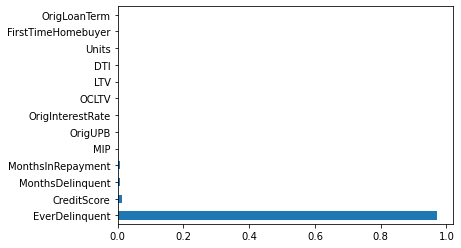

In [57]:
f_i=pd.Series(tree_model.feature_importances_,index=dt.columns)
f_i.nlargest(14).plot(kind='barh')
plt.show()

# Feature Selection

In [58]:
from sklearn.feature_selection import VarianceThreshold
variance_threshold=VarianceThreshold(threshold=0)
variance_threshold.fit(dt)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In feature selection I used variance threshold by this if true then it means
that features has not zero variance so these are important features 

In [59]:
# important features
variance_threshold.get_feature_names_out()

array(['CreditScore', 'FirstTimeHomebuyer', 'MIP', 'Units', 'OCLTV',
       'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype=object)

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
# make the dumies of independent features:
features=['CreditScore','FirstTimeHomebuyer','OrigLoanTerm','OCLTV','DTI','DTI','LTV','MonthsDelinquent','MonthsInRepayment']
encoding=pd.get_dummies(dt,columns=features,drop_first=False)

In [62]:
final_dt=[encoding]
loan_data=pd.concat(final_dt,axis=1)

In [63]:
loan_data.head(7)

,MIP,Units,OrigUPB,OrigInterestRate,EverDelinquent,CreditScore_0,CreditScore_1,CreditScore_2,CreditScore_3,FirstTimeHomebuyer_0,FirstTimeHomebuyer_1,OrigLoanTerm_0,OrigLoanTerm_1,OrigLoanTerm_2,OCLTV_0,OCLTV_1,OCLTV_2,DTI_0,DTI_1,DTI_2,DTI_0,DTI_1,DTI_2,LTV_0,LTV_1,LTV_2,MonthsDelinquent_0,MonthsDelinquent_1,MonthsDelinquent_2,MonthsInRepayment_0,MonthsInRepayment_1,MonthsInRepayment_2,MonthsInRepayment_3,MonthsInRepayment_4
0,25,1,117000,6.750,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,109000,6.500,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,0,1,88000,6.875,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0,1,160000,6.875,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
4,0,1,109000,7.125,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
5,25,1,207000,7.125,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0
6,25,1,111000,6.875,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0


In [64]:
loan_data.shape

(213436, 34)

In [65]:
x=loan_data.drop('EverDelinquent',axis=1)
y=loan_data.EverDelinquent

In [66]:
x.head(2)

,MIP,Units,OrigUPB,OrigInterestRate,CreditScore_0,CreditScore_1,CreditScore_2,CreditScore_3,FirstTimeHomebuyer_0,FirstTimeHomebuyer_1,OrigLoanTerm_0,OrigLoanTerm_1,OrigLoanTerm_2,OCLTV_0,OCLTV_1,OCLTV_2,DTI_0,DTI_1,DTI_2,DTI_0,DTI_1,DTI_2,LTV_0,LTV_1,LTV_2,MonthsDelinquent_0,MonthsDelinquent_1,MonthsDelinquent_2,MonthsInRepayment_0,MonthsInRepayment_1,MonthsInRepayment_2,MonthsInRepayment_3,MonthsInRepayment_4
0,25,1,117000,6.75,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,109000,6.50,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [67]:
y

0         0
1         0
2         0
3         0
4         0
         ..
291446    0
291447    0
291448    0
291449    0
291450    0
Name: EverDelinquent, Length: 213436, dtype: int64

In [68]:
# All discrete features should now have integer dtypes
num_col = x.dtypes == int

In [69]:
from sklearn.feature_selection import mutual_info_classif
def classif_mi_scores(x, y, num_col):
    mutual_score = mutual_info_classif(x, y, discrete_features=num_col)
    mutual_score = pd.Series(mutual_score, name="Mutual Information Score", index=x.columns)
    mutual_score = mutual_score.sort_values(ascending=False)
    return mutual_score
mutual_score = classif_mi_scores(x, y,num_col)

In [70]:
mutual_score*100

MonthsDelinquent_2      4.653022
OrigLoanTerm_0          3.528525
Units                   3.132152
LTV_0                   3.130705
OCLTV_0                 3.095631
FirstTimeHomebuyer_0    2.647599
MonthsInRepayment_0     2.375946
CreditScore_3           1.864094
CreditScore_0           1.746211
DTI_1                   1.702268
DTI_1                   1.696720
MonthsInRepayment_2     1.035580
MonthsDelinquent_1      0.961635
CreditScore_2           0.837176
CreditScore_1           0.605145
OrigInterestRate        0.583903
MIP                     0.447958
MonthsInRepayment_1     0.356083
MonthsInRepayment_3     0.332725
MonthsDelinquent_0      0.245967
MonthsInRepayment_4     0.233400
OrigUPB                 0.215856
DTI_2                   0.162420
FirstTimeHomebuyer_1    0.154449
DTI_0                   0.130800
DTI_0                   0.115177
OCLTV_2                 0.075417
OCLTV_1                 0.072909
LTV_2                   0.070198
LTV_1                   0.053201
DTI_2     

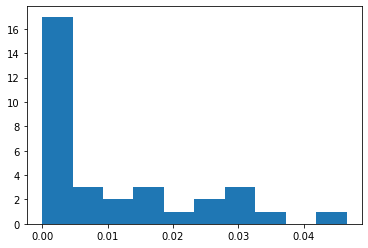

In [71]:
plt.hist(mutual_score,align='mid')
plt.show()

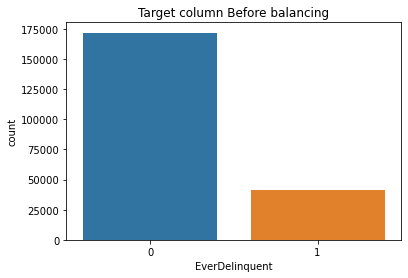

In [72]:
sns.countplot(loan_data['EverDelinquent'])
plt.title('Target column Before balancing')
plt.show()

In [73]:
# make dateset balanced by oversample technique, over sample the target column and make in same range
# balancing the dataset
from imblearn.over_sampling import SMOTE
smot=SMOTE(sampling_strategy=1)
X_smot,Y_smot=smot.fit_resample(x,y)

In [74]:
X_smot.head()

,MIP,Units,OrigUPB,OrigInterestRate,CreditScore_0,CreditScore_1,CreditScore_2,CreditScore_3,FirstTimeHomebuyer_0,FirstTimeHomebuyer_1,OrigLoanTerm_0,OrigLoanTerm_1,OrigLoanTerm_2,OCLTV_0,OCLTV_1,OCLTV_2,DTI_0,DTI_1,DTI_2,DTI_0,DTI_1,DTI_2,LTV_0,LTV_1,LTV_2,MonthsDelinquent_0,MonthsDelinquent_1,MonthsDelinquent_2,MonthsInRepayment_0,MonthsInRepayment_1,MonthsInRepayment_2,MonthsInRepayment_3,MonthsInRepayment_4
0,25,1,117000,6.750,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,109000,6.500,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,0,1,88000,6.875,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0,1,160000,6.875,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
4,0,1,109000,7.125,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [75]:
Y_smot

0         0
1         0
2         0
3         0
4         0
         ..
343543    1
343544    1
343545    1
343546    1
343547    1
Name: EverDelinquent, Length: 343548, dtype: int64

In [76]:
print('Target Column Before sampling(Inbalanced):')
print(y.value_counts())
print()
print('Target Column After sampling(Balanced): ')
print(Y_smot.value_counts())

Target Column Before sampling(Inbalanced):
0    171774
1     41662
Name: EverDelinquent, dtype: int64

Target Column After sampling(Balanced): 
0    171774
1    171774
Name: EverDelinquent, dtype: int64


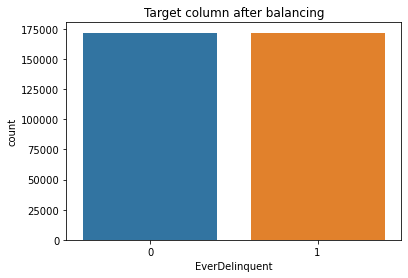

In [77]:
sns.countplot(Y_smot)
plt.title('Target column after balancing')
plt.show()

In [78]:
X_smot.columns

Index(['MIP', 'Units', 'OrigUPB', 'OrigInterestRate', 'CreditScore_0',
       'CreditScore_1', 'CreditScore_2', 'CreditScore_3',
       'FirstTimeHomebuyer_0', 'FirstTimeHomebuyer_1', 'OrigLoanTerm_0',
       'OrigLoanTerm_1', 'OrigLoanTerm_2', 'OCLTV_0', 'OCLTV_1', 'OCLTV_2',
       'DTI_0', 'DTI_1', 'DTI_2', 'DTI_0', 'DTI_1', 'DTI_2', 'LTV_0', 'LTV_1',
       'LTV_2', 'MonthsDelinquent_0', 'MonthsDelinquent_1',
       'MonthsDelinquent_2', 'MonthsInRepayment_0', 'MonthsInRepayment_1',
       'MonthsInRepayment_2', 'MonthsInRepayment_3', 'MonthsInRepayment_4'],
      dtype='object')

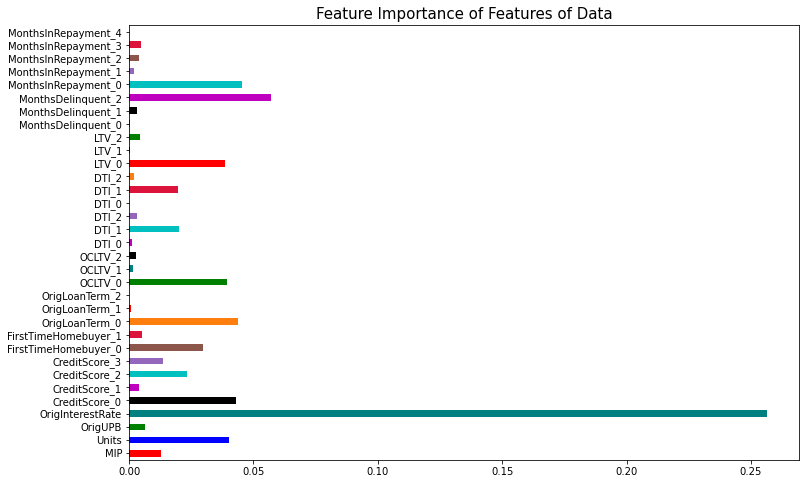

In [79]:
# feature importance 
from sklearn.feature_selection import mutual_info_classif
imp=mutual_info_classif(X_smot,Y_smot)
feature_imp=pd.Series(imp,X_smot.columns[0:len(X_smot.columns)])
feature_imp.plot(kind='barh',color=['red','blue','green','teal','k','m','c','tab:purple','tab:brown','crimson','tab:orange'],figsize=(12,8))
plt.title('Feature Importance of Features of Data',fontsize=15)
plt.show()

In [80]:
X_smot.columns.duplicated().sum()

3

In [81]:
# Remove duplicate columns pandas DataFrame
X_smot = X_smot.loc[:,~X_smot.columns.duplicated()]
X_smot.columns

Index(['MIP', 'Units', 'OrigUPB', 'OrigInterestRate', 'CreditScore_0',
       'CreditScore_1', 'CreditScore_2', 'CreditScore_3',
       'FirstTimeHomebuyer_0', 'FirstTimeHomebuyer_1', 'OrigLoanTerm_0',
       'OrigLoanTerm_1', 'OrigLoanTerm_2', 'OCLTV_0', 'OCLTV_1', 'OCLTV_2',
       'DTI_0', 'DTI_1', 'DTI_2', 'LTV_0', 'LTV_1', 'LTV_2',
       'MonthsDelinquent_0', 'MonthsDelinquent_1', 'MonthsDelinquent_2',
       'MonthsInRepayment_0', 'MonthsInRepayment_1', 'MonthsInRepayment_2',
       'MonthsInRepayment_3', 'MonthsInRepayment_4'],
      dtype='object')

In [82]:
X_smot.drop(['MIP','OrigUPB'],axis=1,inplace=True)

In [83]:
X_smot.head()

,Units,OrigInterestRate,CreditScore_0,CreditScore_1,CreditScore_2,CreditScore_3,FirstTimeHomebuyer_0,FirstTimeHomebuyer_1,OrigLoanTerm_0,OrigLoanTerm_1,OrigLoanTerm_2,OCLTV_0,OCLTV_1,OCLTV_2,DTI_0,DTI_1,DTI_2,LTV_0,LTV_1,LTV_2,MonthsDelinquent_0,MonthsDelinquent_1,MonthsDelinquent_2,MonthsInRepayment_0,MonthsInRepayment_1,MonthsInRepayment_2,MonthsInRepayment_3,MonthsInRepayment_4
0,1,6.750,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,1,6.500,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,1,6.875,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,1,6.875,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
4,1,7.125,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [84]:
X_smot.shape

(343548, 28)

In [85]:
X_smot.nunique()

Units                       5
OrigInterestRate        97348
CreditScore_0               2
CreditScore_1               2
CreditScore_2               2
CreditScore_3               2
FirstTimeHomebuyer_0        2
FirstTimeHomebuyer_1        2
OrigLoanTerm_0              2
OrigLoanTerm_1              2
OrigLoanTerm_2              2
OCLTV_0                     2
OCLTV_1                     2
OCLTV_2                     2
DTI_0                       2
DTI_1                       2
DTI_2                       2
LTV_0                       2
LTV_1                       2
LTV_2                       2
MonthsDelinquent_0          2
MonthsDelinquent_1          2
MonthsDelinquent_2          2
MonthsInRepayment_0         2
MonthsInRepayment_1         2
MonthsInRepayment_2         2
MonthsInRepayment_3         2
MonthsInRepayment_4         2
dtype: int64

# MODEL BUILDING

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_smot,Y_smot,test_size=0.2,random_state=0)

In [88]:
scaler = StandardScaler().fit(xtrain)
train_sc = scaler.transform(xtrain)
test_sc = scaler.transform(xtest)

# MODEL NO 1 LOGISTIC MODEL

In [89]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(train_sc,ytrain)

LogisticRegression()

In [90]:
test_sc

array([[-0.10375854, -0.22384096,  2.05433524, ..., -0.20334421,
         1.41991344, -0.24110461],
       [-0.10375854,  0.53573302, -0.48677547, ..., -0.20334421,
        -0.70426828, -0.24110461],
       [-0.10375854, -0.22384096, -0.48677547, ..., -0.20334421,
        -0.70426828, -0.24110461],
       ...,
       [-0.10375854, -1.36320193, -0.48677547, ..., -0.20334421,
        -0.70426828, -0.24110461],
       [-0.10375854,  0.15594603, -0.48677547, ..., -0.20334421,
         1.41991344, -0.24110461],
       [-0.10375854, -0.22384096, -0.48677547, ..., -0.20334421,
         1.41991344, -0.24110461]])

In [91]:
# Accuracy on test data
from sklearn.metrics import accuracy_score, classification_report
y_pred=model1.predict(test_sc)
model_accu=accuracy_score(y_pred,ytest)
print('Accuracy of the Logistic Regression model over testing data is: ',model_accu)

Accuracy of the Logistic Regression model over testing data is:  0.7808615921990977


In [92]:
# Accuracy on training data
from sklearn.metrics import accuracy_score, classification_report
y_pred=model1.predict(train_sc)
model_accu1=accuracy_score(y_pred,ytrain)
print('Accuracy of the Logistic Regression model over training data is: ',model_accu1)

Accuracy of the Logistic Regression model over training data is:  0.7812638718081197


# Hyperperameter tunning On Logistic Model

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
parameters={'penalty':['l1','l2'],
            'C':[1,2,3,4,5,6,7,8,9,10],
            'max_iter':[100,200,300,400,500,600,700,800,900,1000]}  
gridcv=RandomizedSearchCV(estimator=model1,param_distributions=parameters,n_jobs=-1,cv=5)
gridcv.fit(train_sc,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000],
                                        'penalty': ['l1', 'l2']})

In [95]:
# accuracy on training data after tunning
y_pred=gridcv.predict(train_sc)
print('Accuracy of logistic Model on training data is: ',accuracy_score(y_pred,ytrain))

Accuracy of logistic Model on training data is:  0.7812565947940241


In [96]:
# accuracy on testing data after tunning
y_pred=gridcv.predict(test_sc)
print('Accuracy of logistic Model on testing data is: ',accuracy_score(y_pred,ytest))

Accuracy of logistic Model on testing data is:  0.7808324843545336


In [97]:
gridcv.best_params_

{'penalty': 'l2', 'max_iter': 300, 'C': 4}

# MODEL NO 2 KNN MODEL

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(train_sc,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [99]:
# Accuracy on test data
from sklearn.metrics import accuracy_score, classification_report
y_pred=knn.predict(test_sc)
knn_cr=classification_report(y_pred,ytest)

In [100]:
print(knn_cr)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     41184
           1       0.74      0.92      0.82     27526

    accuracy                           0.84     68710
   macro avg       0.84      0.86      0.84     68710
weighted avg       0.86      0.84      0.84     68710



In [101]:
# Accuracy on training data
from sklearn.metrics import accuracy_score, classification_report
y_pred=knn.predict(train_sc)
knn_accu1=classification_report(y_pred,ytrain)

In [102]:
print(knn_accu1)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86    163908
           1       0.75      0.93      0.83    110930

    accuracy                           0.85    274838
   macro avg       0.85      0.86      0.85    274838
weighted avg       0.87      0.85      0.85    274838



# Model NO 3 Decsion Tree Classifier Model:

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtc=DecisionTreeClassifier()
dtc.fit(train_sc,ytrain)

DecisionTreeClassifier()

In [105]:
# accuracy of model on testing data:
y_pred=dtc.predict(test_sc)
dtc_cr=classification_report(y_pred,ytest)

In [106]:
print(dtc_cr)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     41528
           1       0.75      0.95      0.84     27182

    accuracy                           0.86     68710
   macro avg       0.86      0.87      0.86     68710
weighted avg       0.88      0.86      0.86     68710



In [107]:
# accuracy of model on traing data:
y_pred=dtc.predict(train_sc)
dtc_cr=classification_report(y_pred,ytrain)

In [108]:
print(dtc_cr)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88    164807
           1       0.77      0.96      0.85    110031

    accuracy                           0.87    274838
   macro avg       0.87      0.88      0.87    274838
weighted avg       0.89      0.87      0.87    274838



[Text(0.6484518029618319, 0.9880952380952381, 'X[2] <= 0.784\ngini = 0.5\nsamples = 274838\nvalue = [137217, 137621]'), Text(0.41447030679378566, 0.9642857142857143, 'X[4] <= 0.498\ngini = 0.491\nsamples = 222190\nvalue = [95784, 126406]'), Text(0.2167003024880572, 0.9404761904761905, 'X[3] <= 0.555\ngini = 0.432\nsamples = 146039\nvalue = [46188, 99851]'), Text(0.10199478040515557, 0.9166666666666666, 'X[5] <= 0.943\ngini = 0.299\nsamples = 75334\nvalue = [13779, 61555]'), Text(0.10180637991428397, 0.8928571428571429, 'gini = 0.0\nsamples = 32219\nvalue = [0, 32219]'), Text(0.10218318089602715, 0.8928571428571429, 'X[23] <= 0.168\ngini = 0.435\nsamples = 43115\nvalue = [13779, 29336]'), Text(0.06348474227976553, 0.8690476190476191, 'X[26] <= 0.358\ngini = 0.335\nsamples = 26435\nvalue = [5627, 20808]'), Text(0.03807736747110978, 0.8452380952380952, 'X[27] <= 1.953\ngini = 0.176\nsamples = 11767\nvalue = [1150, 10617]'), Text(0.02262498551119272, 0.8214285714285714, 'X[24] <= 2.483\ngi

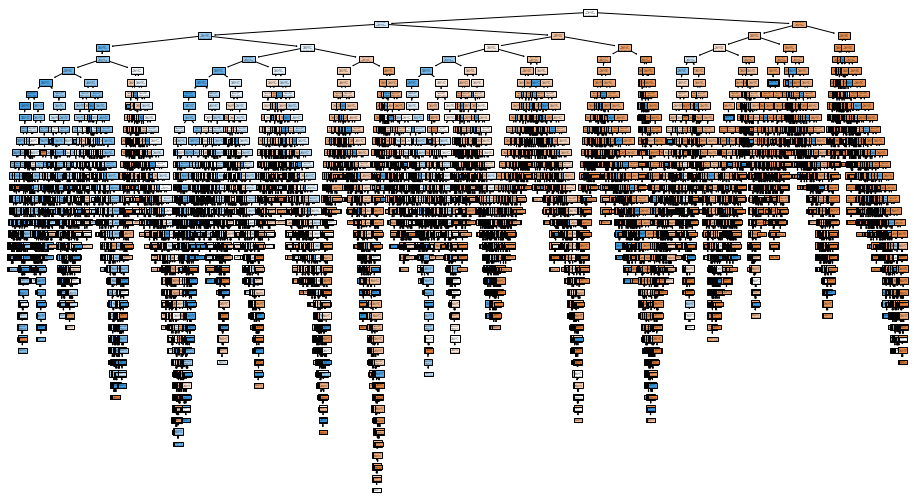

In [109]:
from sklearn import tree
plt.figure(figsize=(16,9))
print(tree.plot_tree(dtc,max_depth=100,filled=True))
plt.show()

# Model N0 4  Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc=RandomForestClassifier()
rfc.fit(train_sc,ytrain)

RandomForestClassifier()

In [112]:
# accuracy of model on testing data:
y_pred=rfc.predict(test_sc)
rfc_cr=classification_report(y_pred,ytest)

In [113]:
print(rfc_cr)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     41488
           1       0.75      0.95      0.84     27222

    accuracy                           0.86     68710
   macro avg       0.86      0.87      0.85     68710
weighted avg       0.88      0.86      0.86     68710



In [114]:
# accuracy of model on traing data:
y_pred=rfc.predict(train_sc)
rfc_cr=classification_report(y_pred,ytrain)

In [115]:
Bprint(rfc_cr)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88    164467
           1       0.77      0.96      0.85    110371

    accuracy                           0.87    274838
   macro avg       0.87      0.88      0.87    274838
weighted avg       0.89      0.87      0.87    274838



# logistic regression model save

In [116]:
import pickle as pk
model_file = 'lr_finalized_model.sav'
pk.dump(model1, open(model_file, 'wb'))

# KNN Classifier model save

In [117]:
import pickle as pk
model_file = 'knn_finalized_model.sav'
pk.dump(knn, open(model_file, 'wb'))

# Decision Tree Model Save

In [118]:
import pickle as pk
model_file = 'decison_tree_finalized_model.sav'
pk.dump(dtc, open(model_file, 'wb'))

# Random Forest Classifier Model Save

In [119]:
import pickle as pk
model_file = 'random_forest_finalized_model.sav'
pk.dump(rfc, open(model_file, 'wb'))